# 1 one-dimensional interpolations

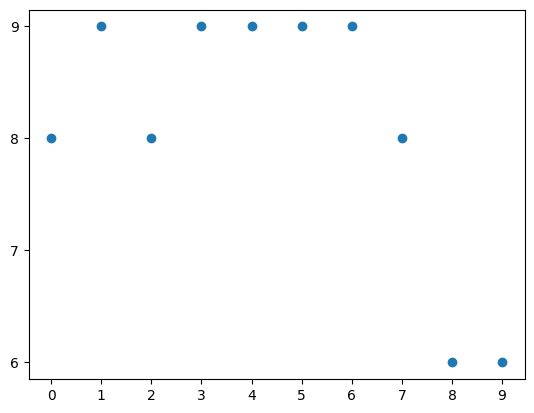

In [36]:
# generating an arbitrary sequence of numbers with (possibly) missing values
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
min = 5
max = 10
length = 10
x = np.arange(0, length)
y = np.random.randint(min, max, length)
x = np.delete(x, np.where(y == 5))
y = np.delete(y, np.where(y == 5))
plt.xticks(np.arange(0, length))
plt.yticks(np.arange(min ,max))
plt.scatter(x,y)
plt.savefig("../../images/2023-05-27-interpolation/1-3.png")

In [2]:
# interpolation function
from scipy import interpolate
def interp(kind):
    f = interpolate.interp1d(x, y, kind=kind)
    xnew = np.arange(0, length-1, 0.1)
    ynew = f(xnew)
    plt.plot(x, y, 'o', xnew, ynew, '-')
    plt.show()


## 1.1 vanilla interpolations

In [180]:
# ‘previous’ and ‘next’ simply return the previous or next value of the point;

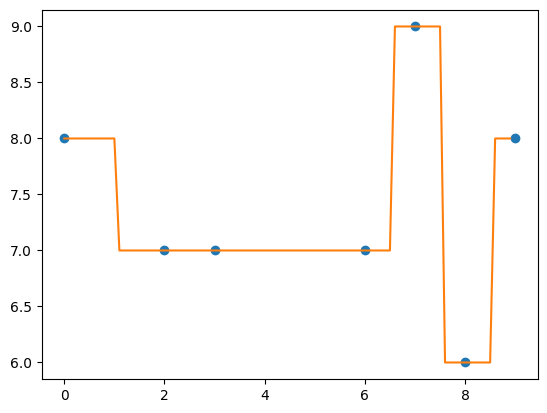

In [181]:
# 1.1.1 nearest
# ‘nearest-up’ and ‘nearest’ differ when interpolating half-integers (e.g. 0.5, 1.5) in that ‘nearest-up’ rounds up and ‘nearest’ rounds down.
interp('nearest')

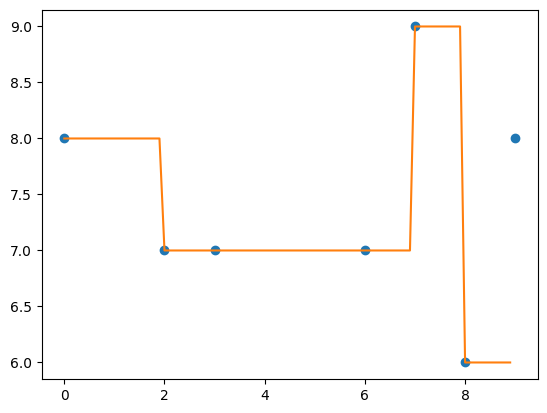

In [159]:
# 1.1.2 previous
interp('previous')

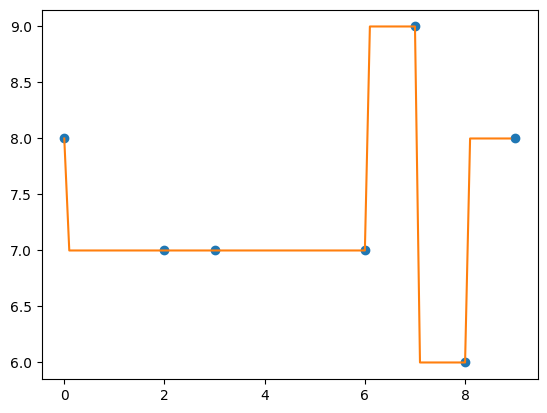

In [160]:
# 1.1.3 next
interp('next')

## 1.2 polynomial interpolations (spline interpolation)

In [161]:
# ‘zero’, ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of zeroth, first, second or third order;

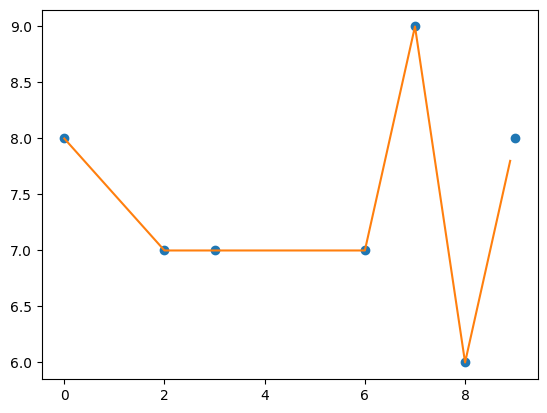

In [162]:
# 1.2.1 linear : first order
# the default interpolation
interp('linear')

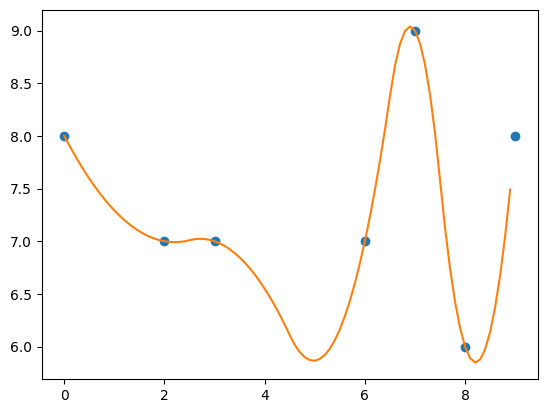

In [163]:
# 1.2.2 quadratic : second order
interp('quadratic')

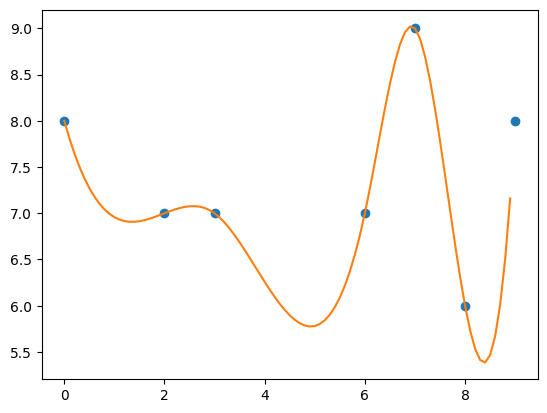

In [164]:
# 1.2.3 cubic : third order
# popular interpolation
interp('cubic')

# 2 two-dimensional interpolations

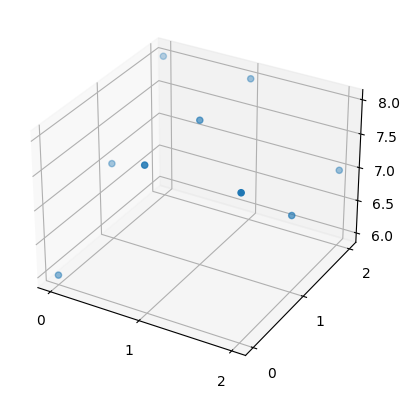

In [44]:
# generating an arbitrary sequence of pairs of numbers (not with missing values)
min = 5
max = 10
length = 3
ax = plt.axes(projection='3d')
x = list(range(length))*length
y = np.array(([[i]*length for i in range(length)])).flatten()
z = np.random.randint(min, max, (length,length))
plt.xticks(np.arange(0, length))
plt.yticks(np.arange(0, length))
ax.scatter3D(x, y, z)
plt.show()

In [4]:
# interpolation function
from scipy import interpolate
def interp(kind):
    f = interpolate.interp1d(x, y, kind=kind)
    xnew = np.arange(0, length-1, 0.1)
    ynew = f(xnew)
    plt.plot(x, y, 'o', xnew, ynew, '-')
    plt.show()

In [304]:
# # generating missing value, unsuccessfully
# missing_points = [(x,y) for (x,y) in zip(np.where(z==5)[0],np.where(z==5)[1])]
# missing_points

In [21]:
from scipy.interpolate import RegularGridInterpolator
import numpy as np
def f(x, y, z):
    return 2 * x**3 + 3 * y**2 - z
x = np.linspace(1, 4, 11)
y = np.linspace(4, 7, 22)
z = np.linspace(7, 9, 33)
xg, yg ,zg = np.meshgrid(x, y, z, indexing='ij', sparse=True)
data = f(xg, yg, zg)

In [22]:
interp = RegularGridInterpolator((x, y, z), data)

In [24]:
pts = np.array([[2.1, 6.2, 8.3],
                [3.3, 5.2, 7.1]])
interp(pts)

array([125.80469388, 146.30069388])

In [27]:
print(interp([1,4,7]))
print(interp([1,4,8]))
print(interp([1,4,7.5]))

[43.]
[42.]
[42.5]


In [30]:
print(interp([1,4,7]))
print(interp([1,5,7]))
print(interp([1,4.5,7]))

[43.]
[70.]
[55.76530612]


In [7]:
pts = np.array([[2.1, 6.2, 8.3],
                [3.3, 5.2, 7.1]])
interp(pts)

array([125.80469388, 146.30069388])

## 2.1 vanilla interpolations

In [8]:
import numpy as np
from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z, kind='cubic')

C:\Users\govin\AppData\Local\Temp\ipykernel_15912\1590228178.py:7: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  f = interpolate.interp2d(x, y, z, kind='cubic')


In [45]:
from scipy.interpolate import RegularGridInterpolator
import numpy as np
def f(x, y, z):
    return 2 * x**3 + 3 * y**2 - z
x = np.linspace(1, 4, 11)
y = np.linspace(4, 7, 22)
z = np.linspace(7, 9, 33)
xg, yg ,zg = np.meshgrid(x, y, z, indexing='ij', sparse=True)
data = f(xg, yg, zg)

In [47]:
data.shape

(11, 22, 33)

In [10]:
interp = RegularGridInterpolator((x, y, z), data)

In [11]:
pts = np.array([[2.1, 6.2, 8.3],
                [3.3, 5.2, 7.1]])
interp(pts)


array([125.80469388, 146.30069388])

In [12]:
f(2.1, 6.2, 8.3), f(3.3, 5.2, 7.1)


(125.54200000000002, 145.894)

In [13]:
x, y = np.array([-2, 0, 4]), np.array([-2, 0, 2, 5])
def ff(x, y):
    return x**2 + y**2


In [14]:
xg, yg = np.meshgrid(x, y, indexing='ij')
data = ff(xg, yg)
interp = RegularGridInterpolator((x, y), data,
                                 bounds_error=False, fill_value=None)


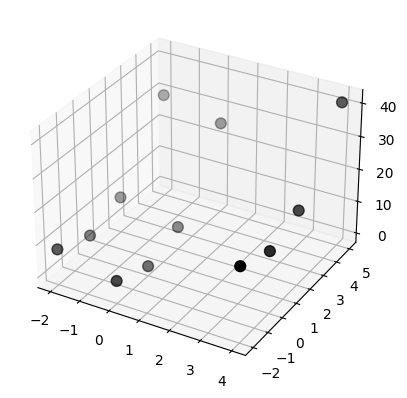

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xg.ravel(), yg.ravel(), data.ravel(),
           s=60, c='k', label='data')


In [16]:
xx = np.linspace(-4, 9, 31)
yy = np.linspace(-4, 9, 31)
X, Y = np.meshgrid(xx, yy, indexing='ij')


In [17]:
# interpolator
ax.plot_wireframe(X, Y, interp((X, Y)), rstride=3, cstride=3,
                  alpha=0.4, color='m', label='linear interp')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


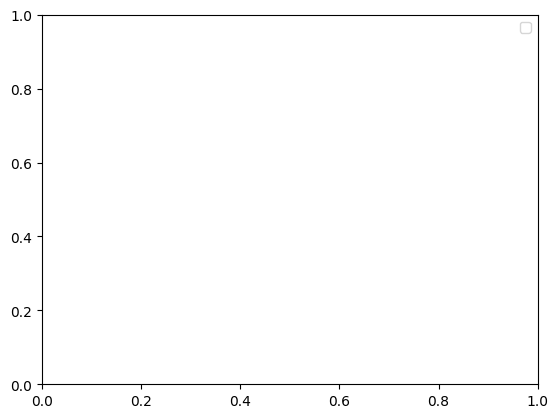

In [18]:
# ground truth
ax.plot_wireframe(X, Y, ff(X, Y), rstride=3, cstride=3,
                  alpha=0.4, label='ground truth')
plt.legend()
plt.show()


In [ ]:
# 2.1.1 nearest

## 2.2 polynomial interpolations (spline interpolation)